In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Описание задачи

Данный датасет представляет собой опрос авиапассажиров касательно их удовлетворённости от полёта данной авиакомпанией. Необходимо по имеющимся признакам определить, будет ли авиапассажир удовлетворён полётом или нет.

### Признаки

Датасет содержит столбы (признаки) со следующими именами:
- _Gender_: Пол пассажира (мужской или женский)
- _Customer Type_: Тип клиента (постоянный или нет)
- _Age_: Возраст пассажира
- _Type of Travel_: Цель полета пассажира (личная или деловая поездка)
- _Class_: Класс обслуживания пассажира (Эконом, Эконом-Плюс, Бизнес)
- _Flight distance_: Расстояние полёта (км)
- _Inflight wifi service_: Уровень удовлетворенности пассажира услугами Wi-Fi на борту (0 - неудовлетворён, 1-5)
- _Departure/Arrival time convenient_: Уровень удовлетворенности пассажира удобностью времени отправления/прибытия (0 - неудовлетворён, 1-5)
- _Ease of Online booking_: Уровень удовлетворенности пассажира онлайн-бронированием (0 - неудовлетворён, 1-5)
- _Gate location_: Уровень удовлетворенности пассажира расположением "гейта" (0 - неудовлетворён, 1-5)
- _Food and drink_: Уровень удовлетворенности пассажира едой и напитками (0 - неудовлетворён, 1-5)
- _Online boarding_: Уровень удовлетворенности пассажира онлайн-посадкой (0 - неудовлетворён, 1-5)
- _Seat comfort_: Уровень удовлетворенности пассажира комфортом сиденья (0 - неудовлетворён, 1-5)
- _Inflight entertainment_: Уровень удовлетворенности пассажира развлечениями в самолёте (0 - неудовлетворён, 1-5)
- _On-board service_: Уровень удовлетворенности пассажира обслуживанием в самолёте (0 - неудовлетворён, 1-5)
- _Leg room service_: Уровень удовлетворенности пассажира пространством для ног в самолёте (0 - неудовлетворён, 1-5)
- _Baggage handling_: Уровень удовлетворенности пассажира обслуживанием багажа (0 - неудовлетворён, 1-5)
- _Check-in service_: Уровень удовлетворенности пассажира процессом регистрации (0 - неудовлетворён, 1-5)
- _Inflight service_: Уровень удовлетворенности пассажира обслуживанием на протяжении полёта (0 - неудовлетворён, 1-5)
- _Cleanliness_: Уровень удовлетворенности пассажира чистотой (0 - неудовлетворён, 1-5)
- _Departure Delay in Minutes_: Задержка вылета в минутах
- _Arrival Delay in Minutes_: Задержка прибытия в минутах
- _Satisfaction_: Уровень удовлетворенности пассажира полётом (Удовлетворён, нейтрально или неудовлетворён)

# 2. Обзор датасета

### 2.1 Первичный обзор

Предварительно файлы были скачаны из https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction

In [2]:
df_train = pd.read_csv("input/train.csv")
df_test = pd.read_csv("input/test.csv")

In [3]:
print("Размерности обучающей и тренировочной выборки:", df_train.shape, df_test.shape)

Размерности обучающей и тренировочной выборки: (103904, 25) (25976, 25)


Посмотрим как выглядят данные

In [4]:
df_train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

Бинарные признаки:
- _Gender_
- _Customer Type_
- _Type of Travel_
- _satisfaction_

Номинальные признаки:
- _Class_

Остальные признаки количественные (числовые).

Требуется предсказать бинарный признак _satisfaction_ по остальным признакам. Это _задача классификации_.

Столбцы _Gender_, _Customer Type_, _Type of Travel_, _satisfaction_ и _Class_ содержат категориальные значения. Заменим тип `'Object`' на специальный, предназначенный для хранения категориальных значений.

In [6]:
df_train['Gender'] = df_train['Gender'].astype('category')
df_train['Type of Travel'] = df_train['Type of Travel'].astype('category')
df_train['Customer Type'] = df_train['Customer Type'].astype('category')
df_train['Class'] = df_train['Class'].astype('category')
df_train['satisfaction'] = df_train['satisfaction'].astype('category')

In [7]:
df_train['Class'].dtype

CategoricalDtype(categories=['Business', 'Eco', 'Eco Plus'], ordered=False)

Проверим датасет на наличие пропущенных значений

In [8]:
df_train.isna().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

Из 103904 строк в 310 пропущены значения _Arrival Delay in Minutes_, что составляет 0.3% от общего числа. Поэтому эти строки можно просто исключить.

In [9]:
df_train = df_train.dropna()

Так же удалим ненужный нам первый столбец, который обозначал номер строки.

In [10]:
df_train.drop("Unnamed: 0", axis =1, inplace= True)

In [11]:
df_train.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000
mean,64942.428625,39.380466,1189.325202,2.729753,3.060081,2.756984,2.977026,3.202126,3.250497,3.439765,3.358341,3.382609,3.351401,3.631687,3.304323,3.640761,3.286397,14.747939,15.178678
std,37460.816597,15.113125,997.297235,1.327866,1.525233,1.398934,1.277723,1.329401,1.349433,1.318896,1.333030,1.288284,1.315409,1.181051,1.265396,1.175603,1.312194,38.116737,38.698682
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32562.250000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64890.000000,40.000000,842.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97370.500000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [12]:
df_train.describe(include=['category'])

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,103594,103594,103594,103594,103594
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,52576,84662,71465,49533,58697


In [13]:
for col in df_train.select_dtypes(include=['category']):
    print(df_train[col].value_counts())
    print('\n')

Female    52576
Male      51018
Name: Gender, dtype: int64


Loyal Customer       84662
disloyal Customer    18932
Name: Customer Type, dtype: int64


Business travel    71465
Personal Travel    32129
Name: Type of Travel, dtype: int64


Business    49533
Eco         46593
Eco Plus     7468
Name: Class, dtype: int64


neutral or dissatisfied    58697
satisfied                  44897
Name: satisfaction, dtype: int64




Text(0.5, 1.0, 'Distribution of Age')

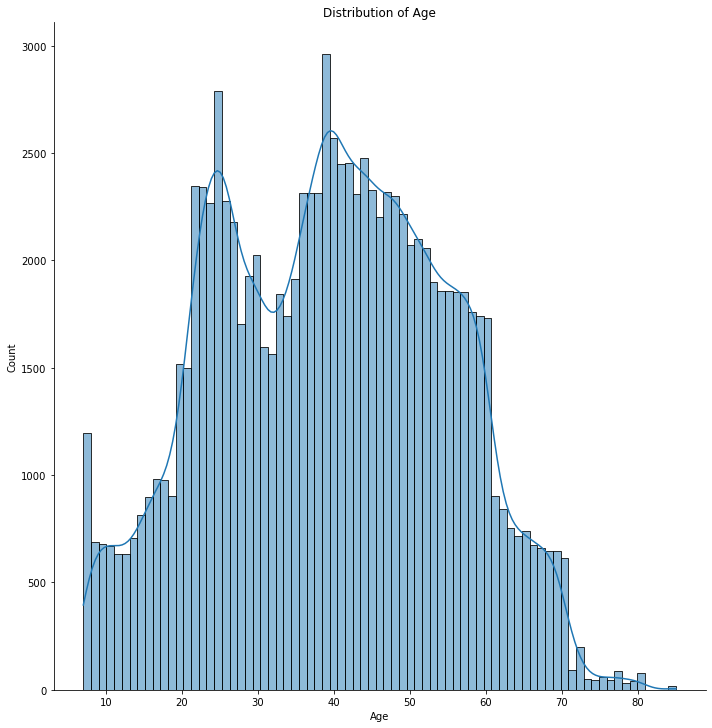

In [14]:
sns.displot(data = df_train['Age'], kde=True, height = 10)
plt.title('Distribution of Age')

Text(0.5, 1.0, 'Distribution of Flight Distance')

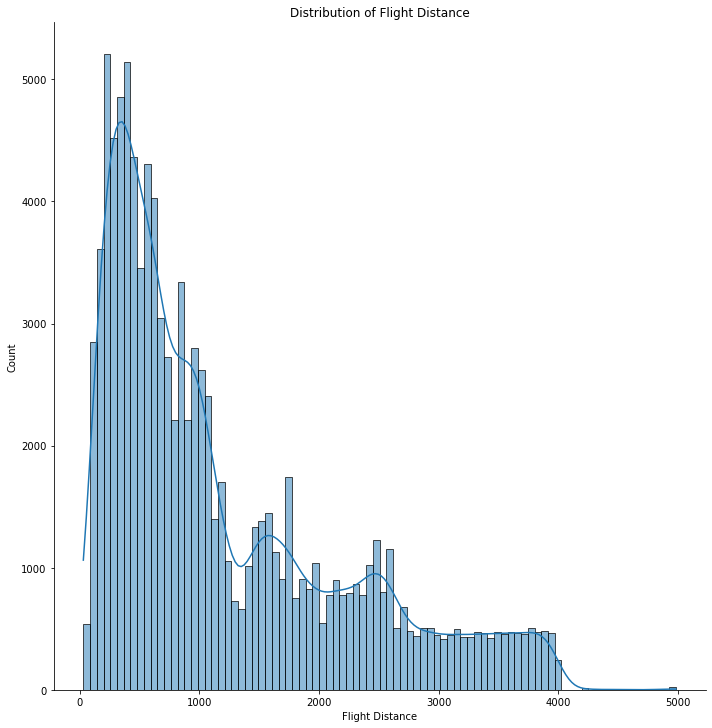

In [15]:
sns.displot(data = df_train['Flight Distance'], kde=True, height = 10)
plt.title('Distribution of Flight Distance')

In [16]:
# График распределения по категориям. Но более наглядно в виде чисел
#
# category_list = list(df_train.select_dtypes(include=['category']))
# for cat in category_list:
#     fig = plt.figure(figsize=(8,6))
#     ax = fig.add_axes([0,0,1,1])
#     sns.countplot(data = df_train, x = cat)
#     plt.title('Value count of ' + cat)
#     ax.set_xlabel(cat,fontsize=15)
#     ax.set_ylabel("Count",fontsize=15)

In [17]:
df_train.quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0.005,649.930,7.0,86.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.000
0.010,1303.930,8.0,101.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.000
0.050,6594.650,14.0,175.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.000
0.100,13052.900,20.0,236.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0,0.0,0.000
0.500,64890.000,40.0,842.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,3.0,0.0,0.000
0.900,116888.700,59.0,2751.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,44.0,44.000
0.950,123412.350,64.0,3384.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,77.0,79.000
0.990,128584.210,70.0,3882.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,181.0,184.000
0.995,129241.035,72.0,3943.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,233.0,238.035


Из описания и графиков мы видим следующее:
- Возраст
    - Минимальный возраст пассажира: 7 лет
    - Средний возраст пассажира: 39 лет
    - Максимальный возраст пассажира: 85 лет
    - Из графика можно сказать, что существует "яма" по количеству пассажиров, которым больше 27 лет и меньше 36
- Дальность полёта
    - Минимальное расстояние: 31 км
    - Среднее расстояние: 1189 км
    - Максимальное расстояние: 4983 км
    - Из графика и описания видно, что большее кол-во перелётов на расстояние меньше 1000 км.
- Задержка вылета
    - Среднее время: 15 мин
    - Максимальное время: 1592 мин
    - При этом, верхний квартиль равняется всего 12 минутам, а квантиль 95% - 44 минуты. Значит, ситуация, соответствующая максимальному значению, это какой-то необычный случай
- Задержка прибытия
    - Среднее время: 15 мин
    - Максимальное время: 1584 мин
    - При этом, верхний квартиль равняется всего 13 минутам, а квантиль 95% - 44 минуты. Значит, ситуация, соответствующая максимальному значению, это какой-то необычный случай
- Оценки критериев
    - Среднее значение всех оценок около 3
- Пол пассажира
    - В датасете представитей одного и другого пола примерно поровну
- Тип клиента
    - В датасете гораздо больше постоянных пассажиров, нежели непостоянных
- Цель полёта пассажира
    - В датасете гораздо больше пассажиров, у которых бизнес-поездка, нежели тех, у которых обычная поездка
- Класс обслуживания пассажира
    - В датасете самый большой по кол-ву пассажиров класс - это бизнес-класс. Причём представителей Эконом-Плюс класса гораздо меньше, чем остальных
- Уровень удовлетворенности пассажира авиакомпанией
    - В датасете соотношение представителей одного и друго класса примерно 56%/44%

Взглянем на распределение по уровню удовлетворенности пассажира авиакомпанией для 10 самых больших значений задержки вылета.

In [18]:
df_train.nlargest(10, "Departure Delay in Minutes")["satisfaction"].value_counts()

neutral or dissatisfied    5
satisfied                  5
Name: satisfaction, dtype: int64

Получаем интересную вещь - для 10 самых больших значений задержки вылета распределение по уровню удовлетворенности пассажира авиакомпанией примерно одинаково, хотя на первый взгляд должно быть так, что для таких значений должно преобладать значение `neutral or dissatisfied`.

Следовательно, если между этими критериями есть связь, то она не такая очевидная, как могла показаться на первый взгляд.

### 2.2 Обзор взаимосвязи уровеня удовлетворенности пассажира авиакомпанией с другими критериями

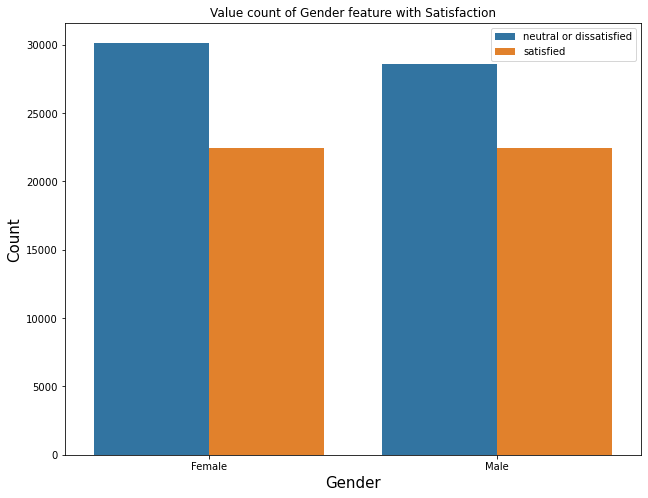

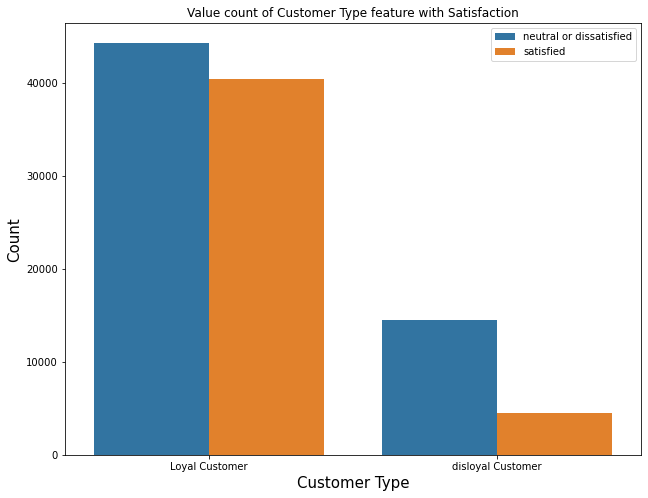

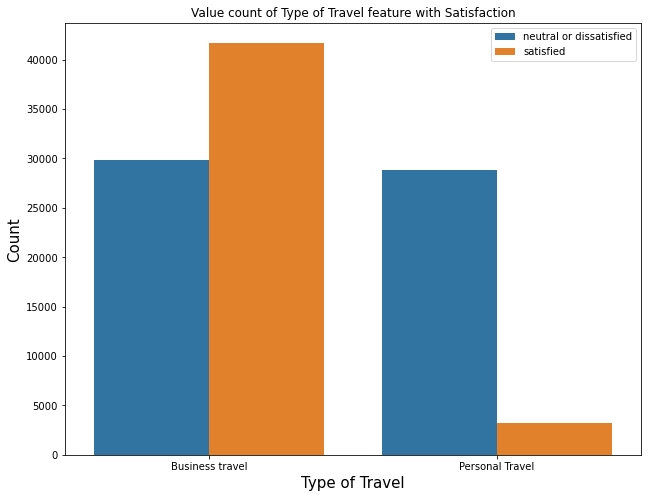

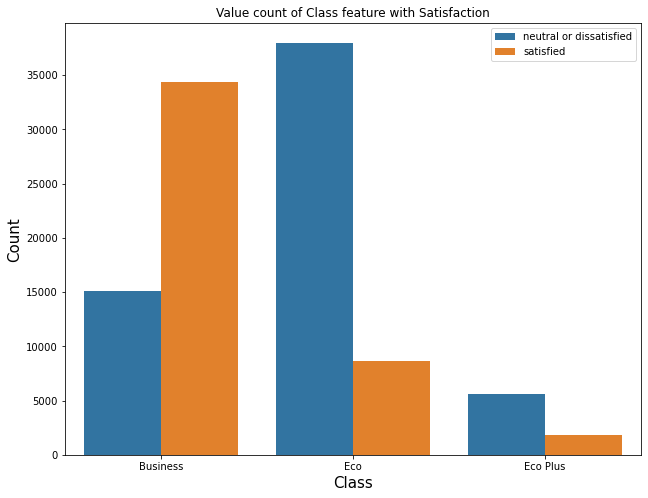

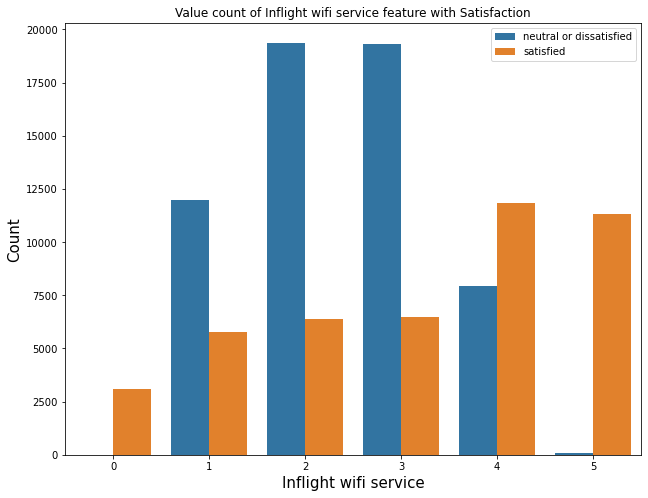

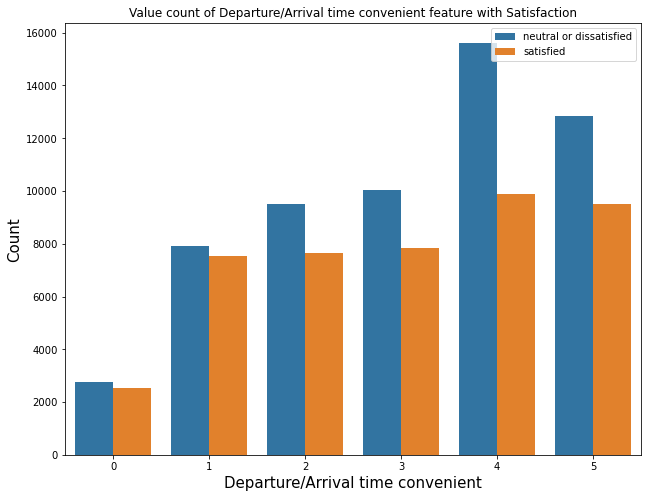

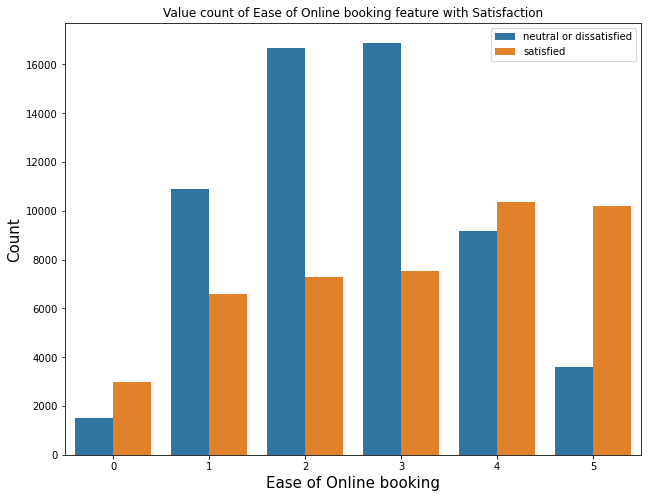

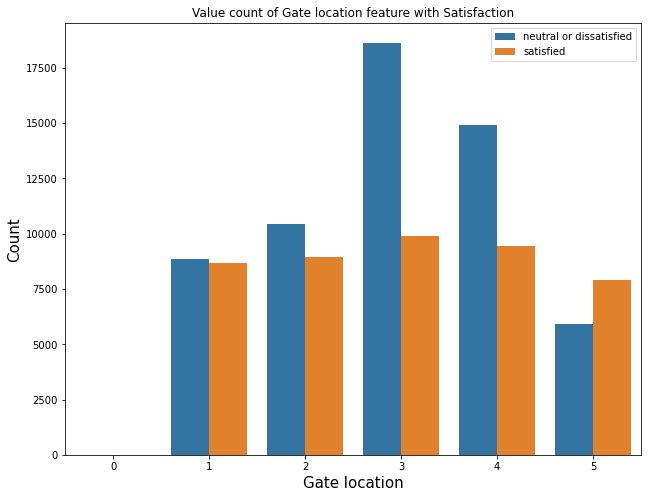

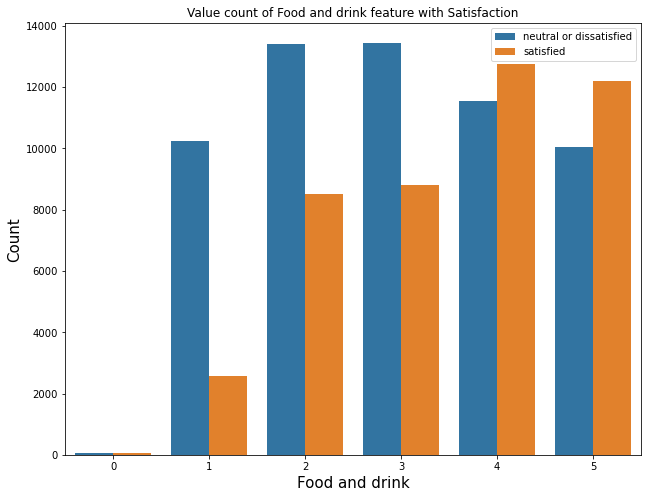

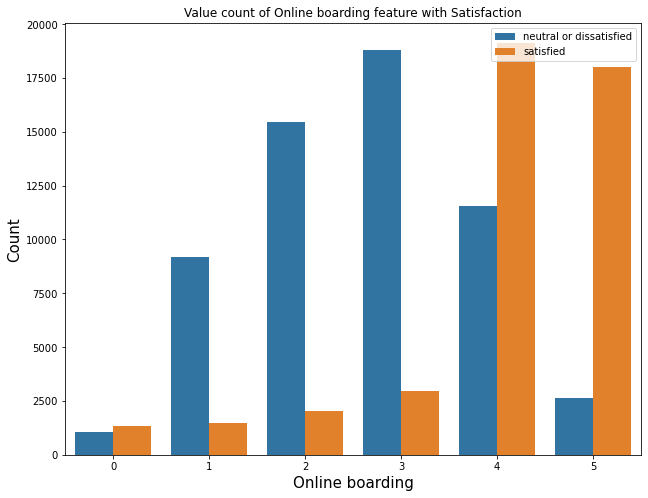

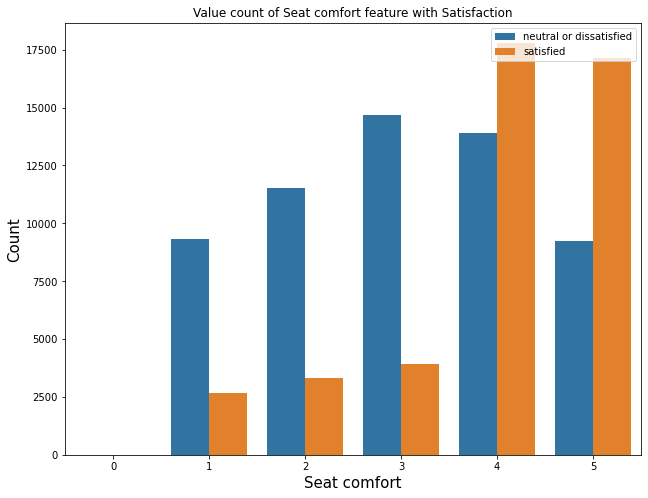

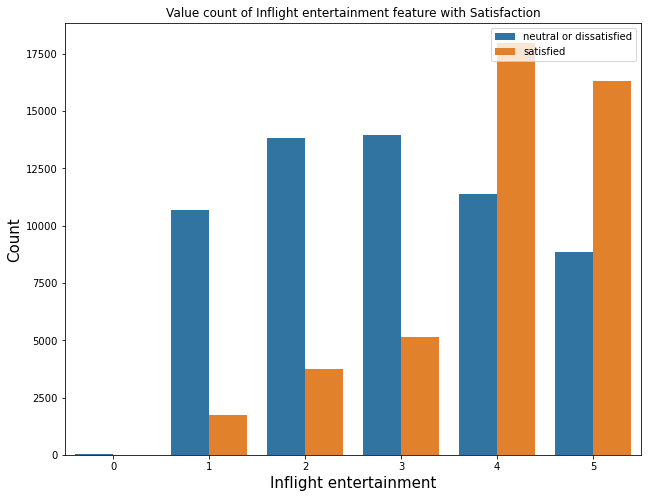

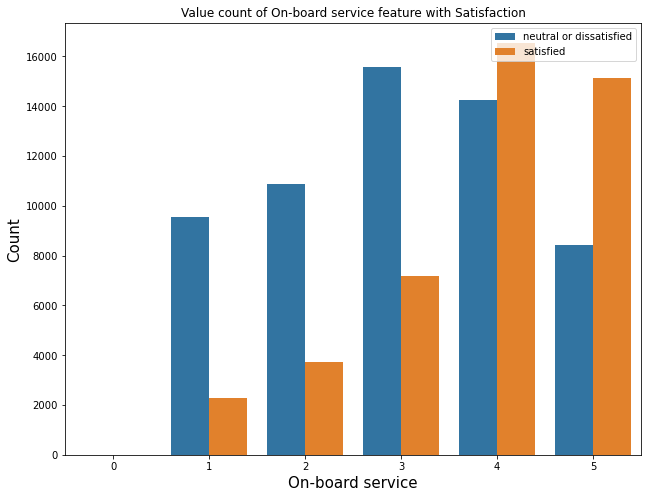

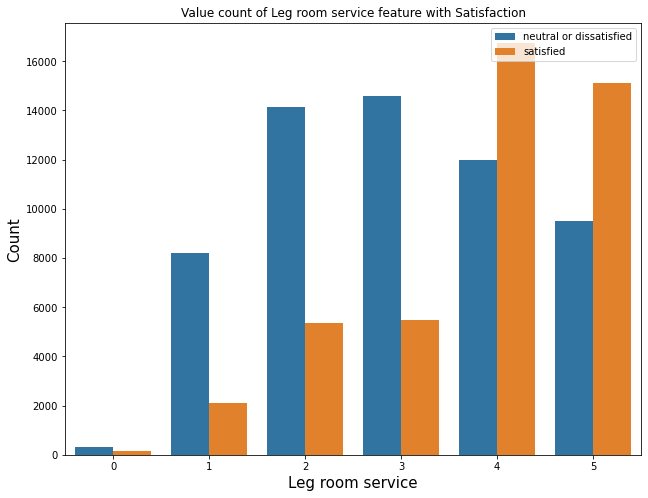

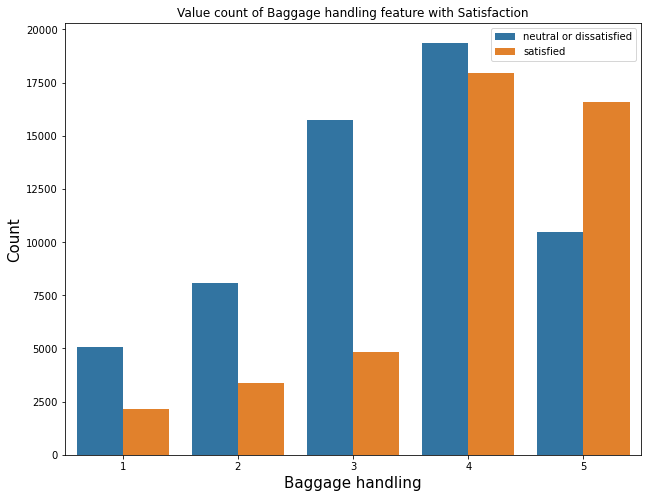

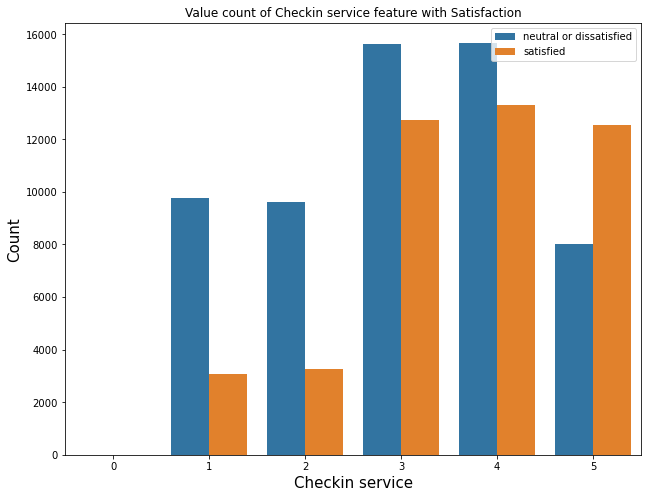

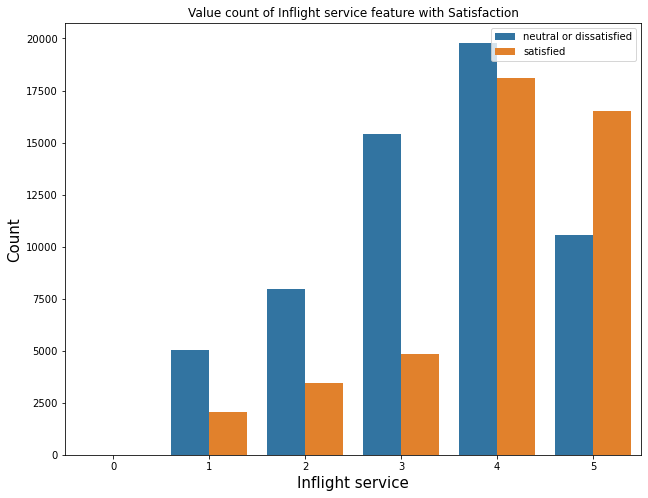

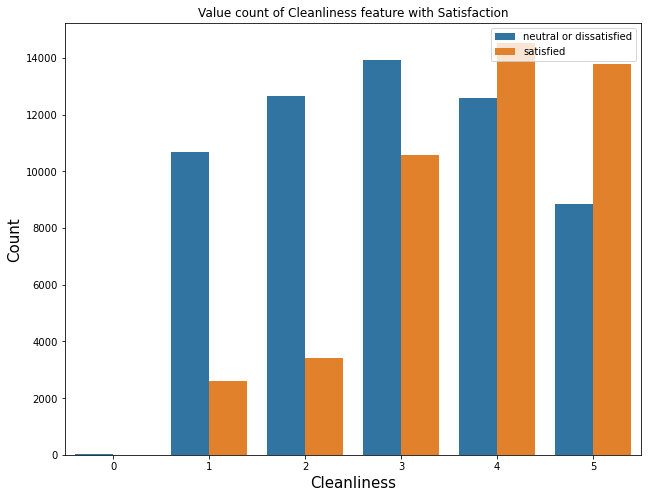

In [19]:
dist_class_index = df_train.columns.drop(["Age", "id", "Arrival Delay in Minutes", 
                                     "Departure Delay in Minutes", "satisfaction", "Flight Distance"])
for sat in dist_class_index:
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_axes([0,0,1,1])
    sns.countplot(data = df_train, x = sat, hue = 'satisfaction')
    plt.legend(loc='upper right')
    plt.title('Value count of ' + sat +' feature with Satisfaction')
    ax.set_xlabel(sat,fontsize=15)
    ax.set_ylabel("Count",fontsize=15)

Исходя из этих графиков, можно сделать следующие выводы:
- Нелояльные клиенты в основном неудовлетворены полётом или нейтрально относятся к нему
- Пассажиры, которые летят по личным делам в основном неудовлетворены полётом или нейтрально относятся к нему. А вот пассажиры, которые летят по бизнес-делам, наоборот, в основном удовлетворены полётом
- Пассажиры, которые летели бизнес-классом в основном удовлетворены полётом. А пассажиры, которые летели эконом-классом или эконом-плюс, наоборот, в основном неудовлетворены полётом или нейтрально относятся к нему. Можно сделать вывод, что в данном случае полёты бизнес-классом больше удовлетворяет людей, нежели полёты на других классах
- Среди пассажиров, которые оценили уровень услуг Wi-Fi на борту на 5, почти нет тех, кто неудовлетворён полётом или нейтрально относится к нему. Из этого можно сделать вывод, что людям, в данном случае, очень важен хороший и стабильный Wi-Fi на борту
- Очень странно то, что среди пассажиров, которые оценили уровень услуг Wi-Fi на борту на 0, почти нет тех, кто неудовлетворён полётом или нейтрально относится к нему.
- Даже среди пассажиров, которые оценили удобность времени отправления/прибытия на 5, больше тех пассажиров, которые в основном неудовлетворены полётом или нейтрально относятся к нему. Можно сделать предположение, что этот критерий мало влияет на уровень удовлетворённости пассажира полётом
- Среди пассажиров, которые оценили уровень онлайн-бронирования на 5, больше тех, кто удовлетворён полётом. Но при этом и среди пассажиров, кто оценил данный критерий на 0, больше тех, кто удовлетворён полётом
- Среди пассажиров, которые оценили уровень онлайн-посадкой на 5, почти нет тех, кто неудовлетворён полётом или нейтрально относится к нему. Судя по всему этот критерий влияет на общий уровень удовлетворенности пассажира полётом.
- Для остальных критериев, можно сказать, что поведение предсказуемое. В большинстве случаев, при оценке критерия от 0 до 3 больше тех пассажиров, которые неудовлетворены полётом или нейтрально относятся к нему, но при оценках 4-5 уже больше тех пассажиров, которые удовлетворены полётом

### 2.3 Матрица корреляции

Text(0.5, 1.0, 'Correlation between features')

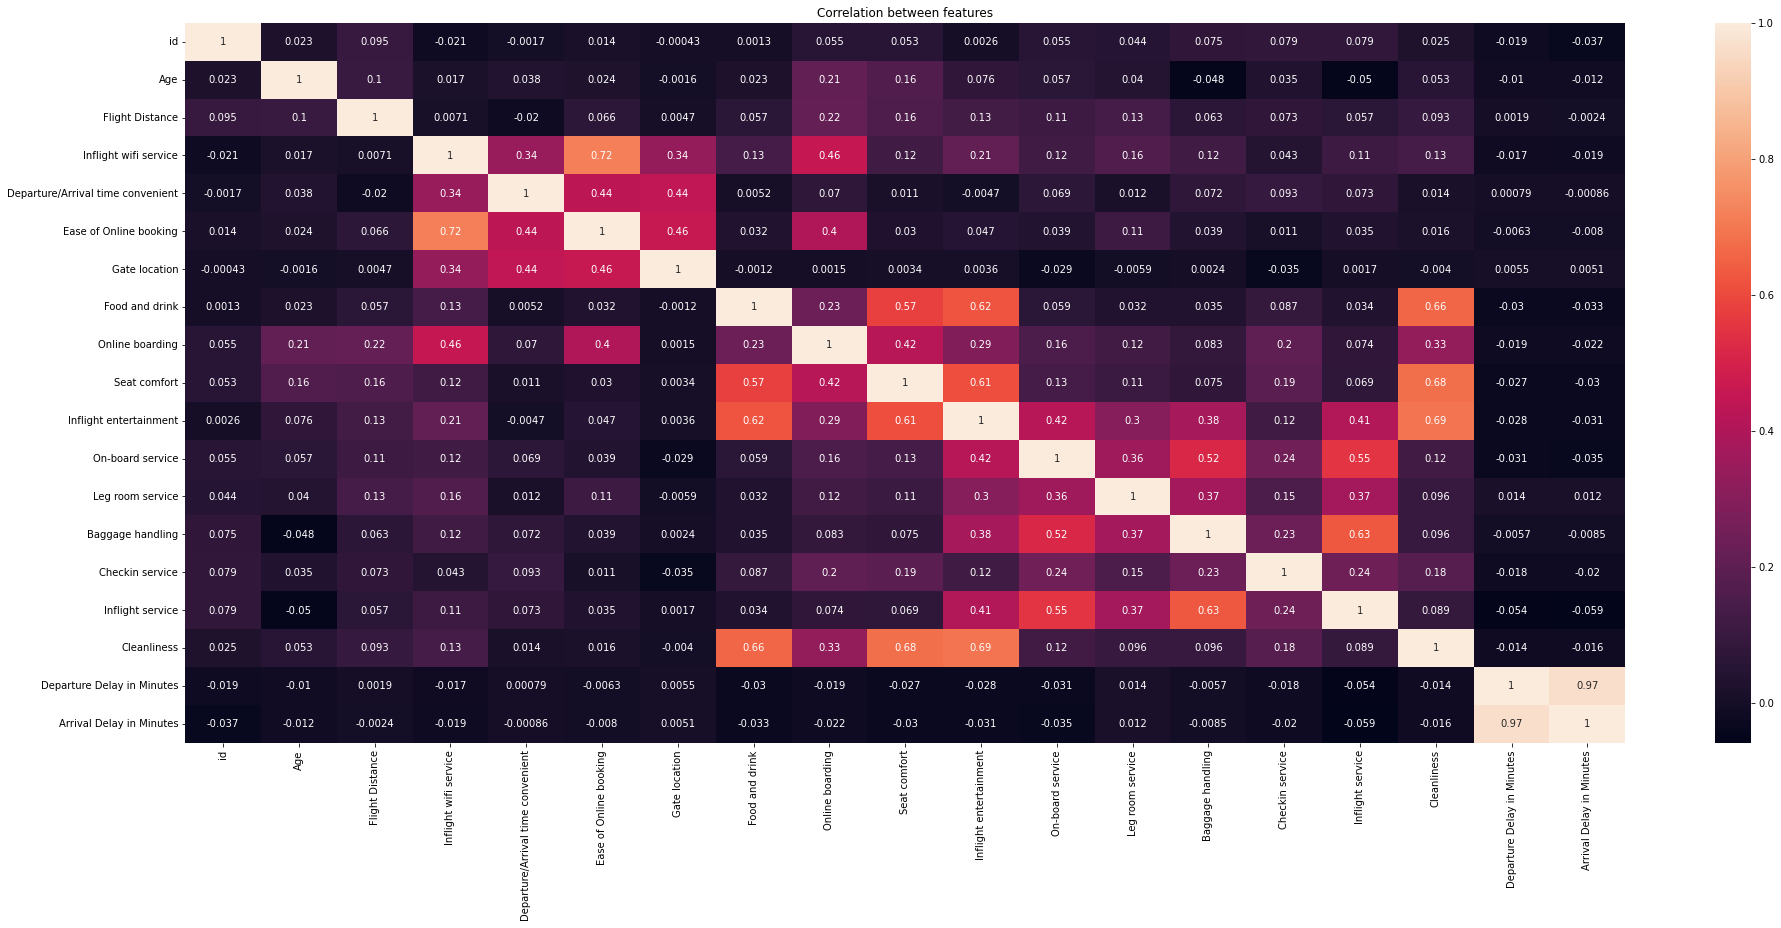

In [20]:
fig = plt.figure(figsize=(25,10))
ax = fig.add_axes([0,0,1,1])
sns.heatmap(df_train.corr(), annot=True)
plt.title('Correlation between features')

По матрице корреляции можно сказать следующее:
- Признак _Inflight wifi service_ коррелирует с признаками _Ease of Online booking_ и _Online boarding_. Эту корреляцию можно объяснить тем, что если человек пользуется онлайн-бронирование и/или онлайн-посадкой, то этот человек активно пользуется интернетом и поэтому ему также важен стабильный и качественный Wi-Fi на борту самолёта
- Признак _Departure/Arrival time convenient_ коррелирует с признаками _Ease of Online booking_ и _Gate location_. Эту корреляцию можно объяснить тем, что человек при онлайн-бронировании сам выбирает удобное для себя время отправления и прибытия
- Признак _Food and drink_ коррелирует с признаками _Seat comfort_, _Inflight service_ и _Cleanliness_. Это очевидные связи, так как понятно, что удовлетворённость едой и напитками связана с удовлетворённостью обслуживания на протяжении полёта 
- Признак _Online boarding_ кроме тех признаков, что были выше, также коррелирует с признаком _Seat comfort_. Эту корреляцию можно объяснить тем, что при онлайн-посадке человек сам может выбрать удобное ему место
- Признак _Seat comfort_ кроме тех признаков, что были выше, также коррелирует с признаками _Inflight entertainment_ и _Cleanliness_. Эту корреляцию можно объяснить тем, что от расположение места может зависеть чистота и некоторые развлечения на борту
- Признак _Inflight entertainment_ кроме тех признаков, что были выше, также коррелирует с признаком _Cleanliness_
- Признак _On-board service_ коррелирует с признаками _Baggage handling_ и _Inflight service_
- Признак _Baggage handling_ кроме тех признаков, что были выше, также коррелирует с признаком _Inflight service_
- Признак _Departure Delay in Minutes_ очень сильно коррелирует с признаком _Arrival Delay in Minutes_. Это очевидная связь, так как если самолёт задержался с вылетом, то он и задержится с прилётом.

После рассмотрения матрицы корреляции, можно удалить один признак из пары сильно коррелирующих признаков для того, чтобы уменьшить кол-во рассматриваемых признаков. То есть из пары _Departure Delay in Minutes_ и _Arrival Delay in Minutes_ можно удалить, например, признак _Arrival Delay in Minutes_.

In [21]:
df_train.drop("Arrival Delay in Minutes", axis =1, inplace= True)

# 3. Бинаризация номинальных признаков

### 3.1 Добавление фиктивных столбцов

Бинарные признаки _Gender_, _Customer Type_, _Type of Travel_, _satisfaction_ заменим на числовые, то есть произойдёт следующая замена: 
- _Gender_
    - 0 соответствует _Female_
    - 1 соответствует _Male_
- _Customer Type_
    - 0 соответствует _Loyal Customer_
    - 1 соответствует _disloyal Customer_
- _Type of Travel_
   - 0 соответствует _Business travel_
   - 1 соответствует _Personal Travel_
- _satisfaction_
    - 0 соответствует _neutral or dissatisfied_
    - 1 соответствует _satisfied_

К категориальному (небинарному) признаку _Class_ применим метод _бинаризации_ (_one-hot encoding_), 
который заключается в следующем.

Этот признак принимает 3 значения: _Business_, _Eco_, _Eco Plus_. Вместо одного признака _Class_ введём 3 новых фиктивных признака: _Class_Business_, _Class_Eco_, _Class_Eco Plus_. Их суть заключается в следующем:
- Если признак _Class_ принимает значение _Business_, то признак _Class_Business_ равен 1, а все остальные 0
- Если признак _Class_ принимает значение _Eco_, то признак _Class_Eco_ равен 1, а все остальные 0
- Если признак _Class_ принимает значение _Eco Plus_, то признак _Class_Eco Plus_ равен 1, а все остальные 0

In [22]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop='if_binary', sparse=False)
enc.fit(df_train[['Gender', 'Type of Travel', 'Customer Type', 'Class', 'satisfaction']])

OneHotEncoder(drop='if_binary', sparse=False)

In [23]:
dummies = pd.DataFrame(enc.transform(df_train[['Gender', 'Type of Travel', 'Customer Type', 'Class', 'satisfaction']]), 
                       columns=enc.get_feature_names_out(), index=df_train.index)
dummies.head()

,Gender_Male,Type of Travel_Personal Travel,Customer Type_disloyal Customer,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_satisfied
0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0


Добавим получившиеся фиктивные столбцы к нашей таблице и удалим исходные столбцы.

In [24]:
df_train = pd.concat((df_train, dummies), axis=1).drop(['Gender', 'Type of Travel', 'Customer Type', 'Class', 'satisfaction'], axis=1)

In [25]:
df_train.head()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Inflight service,Cleanliness,Departure Delay in Minutes,Gender_Male,Type of Travel_Personal Travel,Customer Type_disloyal Customer,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_satisfied
0,70172,13,460,3,4,3,1,5,3,5,...,5,5,25,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,5047,25,235,3,2,3,3,1,3,1,...,4,1,1,1.0,0.0,1.0,1.0,0.0,0.0,0.0
2,110028,26,1142,2,2,2,2,5,5,5,...,4,5,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,24026,25,562,2,5,5,5,2,2,2,...,4,2,11,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,119299,61,214,3,3,3,3,4,5,5,...,3,3,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


### 3.2 Обзор матрицы корреляции с бинаризованными признаками

Text(0.5, 1.0, 'Correlation between features')

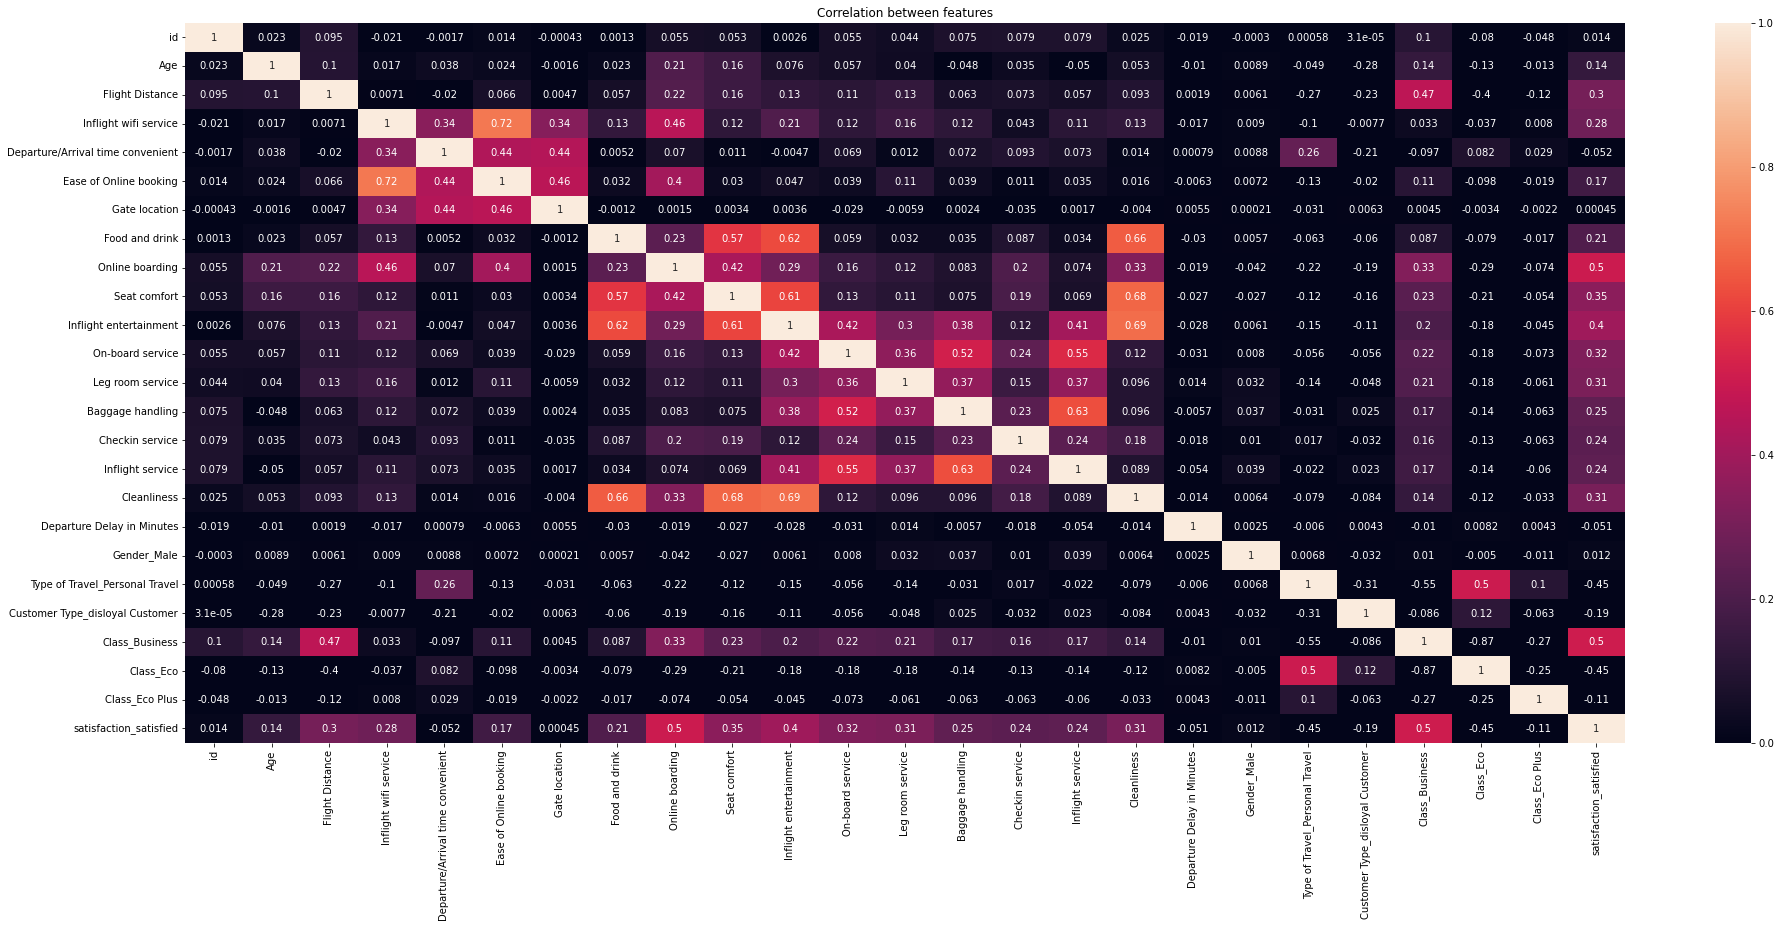

In [26]:
fig = plt.figure(figsize=(25,10))
ax = fig.add_axes([0,0,1,1])
sns.heatmap(df_train.corr(), annot=True, vmin=0, vmax=1)
plt.title('Correlation between features')

По матрице корреляции можно сказать следующее:
- Принадлежность к тому или иному полу никак не влияет на другие признаки
- Признак _Type of Travel_Personal Travel_ коррелирует с признаком _Class_Eco_ и не сильно коррелирует с _Class_Eco Plus_. Эту связь можно объяснить тем, что скорее всего тем пассажирам, которые летят по личным делам, например в путешествие, им важно сэкономить  деньги на перелёте, чтобы больше себе позволить в путешествии
- Признак _Class_Business_ коррелирует с признаками _Flight Distance_ и _satisfaction_satisfied_. Эту связь можно объяснить тем, что, как известно, бизнес-класс обладает повышенным уровнем комфорта, поэтому в целом пассажир будет доволен полётом. Из-за своего уровня комфорта, бизнес-класс выбирают для перемещения на большие дистанции те пассажиры, которые могут его себе позволить.
- Признак _satisfaction_satisfied_ коррелирует со многими признаками, но совсем не коррелирует со следующими признаками:
    - _id_
    - _Departure/Arrival time convenient_. То есть общее впечатление от полёта мало зависит от удобности времени отправления/прибытия
    - _Gate location_. То есть общее впечатление от полёта мало зависит от удобности расположения "гейта"
    - _Departure Delay in Minutes_. Удивительно, но задержка отправления не влияет на общее впечатление от полёта
    - _Gender_Male_
    - _Type of Travel_Personal Travel_. То есть общее впечатление от полёта не зависит от типа путешествия
    - _Customer Type_disloyal Customer_. То есть общее впечатление от полёта не зависит от типа лояльности
    - _Class_Eco_, _Class_Eco Plus_. То есть общее впечатление не зависит от принадлежности к эконом-классу или эконом-плюс классу, но стоит заметить, что сильно зависит от принадлежности к бизнес-классу

Хотелось бы более явно убедиться в том, что признаки _Departure Delay in Minutes_ и _satisfaction_satisfied_ не коррелируют. Для этого разобьём пассажиров на два класса: те пассажиры, у которых задержка вылета была меньше 40 минут, и те пассажиры у которых задержка вылета была больше 40 минут.

In [27]:
df_delay = df_train["Departure Delay in Minutes"] < 40
df_delay.name = "Departure Delay in Minutes < 40"

In [28]:
df_train_delay = pd.concat((df_train, df_delay), axis=1)

Text(0, 0.5, 'Count')

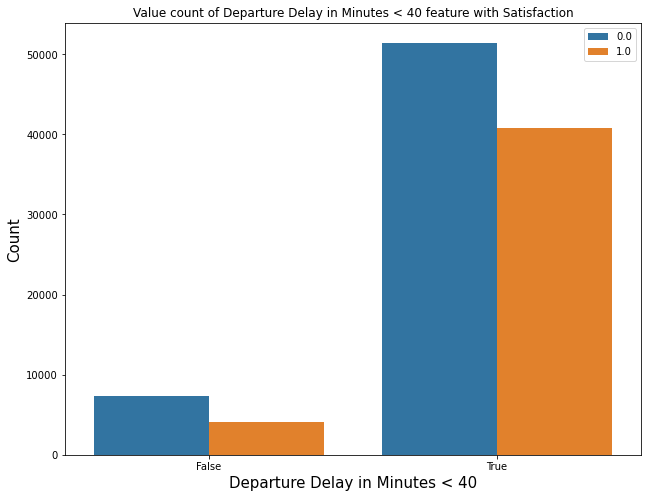

In [29]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_axes([0,0,1,1])
sns.countplot(data = df_train_delay, x = 'Departure Delay in Minutes < 40', hue = 'satisfaction_satisfied')
plt.legend(loc='upper right')
plt.title('Value count of ' + "Departure Delay in Minutes < 40" +' feature with Satisfaction')
ax.set_xlabel('Departure Delay in Minutes < 40',fontsize=15)
ax.set_ylabel("Count",fontsize=15)

Получили следующий график. 0 соответствует тому, что признак _Satisfaction_ имеет значение _neutral or dissatisfied_. 1 соответствует тому, что признак _Satisfaction_ имеет значение _satisfied_.

Как мы можем заметить, даже среди тех пассажиров, у которых задержка вылета была больше 40 минут, достаточное количество тех, кто был удовлетворён полётом

# 4. Нормализация

### 4.1 Стандартизация

Перед применением алгоритмов машинного обучения количественные признаки полезно нормализовать. Из всех доступных способов нормализации выберем способ _стандартизации_. Но в задаче классификации нам не нужно трогать тот признак, который мы хотим предсказать.

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_train)
tmp = df_train['satisfaction_satisfied']
df_train = pd.DataFrame(scaler.transform(df_train), columns=df_train.columns, index=df_train.index)
df_train['satisfaction_satisfied'] = tmp

In [31]:
df_train.head()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Inflight service,Cleanliness,Departure Delay in Minutes,Gender_Male,Type of Travel_Personal Travel,Customer Type_disloyal Customer,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_satisfied
0,0.139602,-1.745542,-0.731305,0.203521,0.616249,0.173716,-1.547312,1.352401,-0.185632,1.182991,...,1.156211,1.305913,0.268966,1.015154,1.491414,-0.472883,-0.957206,-0.904105,3.587718,0.0
1,-1.598890,-0.951526,-0.956916,0.203521,-0.695032,0.173716,0.017981,-1.656487,-0.185632,-1.849863,...,0.305580,-1.742432,-0.360682,1.015154,-0.670505,2.114687,1.044708,-0.904105,-0.278729,0.0
2,1.203545,-0.885358,-0.047454,-0.549571,-0.695032,-0.541118,-0.764666,1.352401,1.296479,1.182991,...,0.305580,1.305913,-0.386917,-0.985072,-0.670505,-0.472883,1.044708,-0.904105,-0.278729,1.0
3,-1.092251,-0.951526,-0.629028,-0.549571,1.271890,1.603383,1.583273,-0.904265,-0.926688,-1.091649,...,0.305580,-0.980345,-0.098328,-0.985072,-0.670505,-0.472883,1.044708,-0.904105,-0.278729,0.0
4,1.451032,1.430521,-0.977973,0.203521,-0.039391,0.173716,0.017981,0.600179,1.296479,1.182991,...,-0.545051,-0.218259,-0.386917,1.015154,-0.670505,-0.472883,1.044708,-0.904105,-0.278729,1.0


# 5. Обучающая и тестовая выборки

### 5.1 Обучающая выборка

Для предсказания уровня удовлетворенности пассажира полётом будем использовать все признаки, кроме _id_.

In [32]:
X_train = df_train.drop(['id', 'satisfaction_satisfied'], axis = 1)
y_train = df_train['satisfaction_satisfied']

### 5.2 Тестовая выборка

Разбивать данные на обучающую и тестовую выборку на не нужно, так как это сделали уже за нас. Но нам нужно проделать с тестовой выборкой все те же операции, что и с обучающей.

In [33]:
df_test.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [34]:
df_test['Gender'] = df_test['Gender'].astype('category')
df_test['Type of Travel'] = df_test['Type of Travel'].astype('category')
df_test['Customer Type'] = df_test['Customer Type'].astype('category')
df_test['Class'] = df_test['Class'].astype('category')
df_test['satisfaction'] = df_test['satisfaction'].astype('category')

In [35]:
df_test = df_test.dropna()
df_test.drop("Unnamed: 0", axis =1, inplace= True)
df_test.drop("Arrival Delay in Minutes", axis =1, inplace= True)

In [36]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop='if_binary', sparse=False)
enc.fit(df_test[['Gender', 'Type of Travel', 'Customer Type', 'Class', 'satisfaction']])

OneHotEncoder(drop='if_binary', sparse=False)

In [37]:
dummies = pd.DataFrame(enc.transform(df_test[['Gender', 'Type of Travel', 'Customer Type', 'Class', 'satisfaction']]), 
                       columns=enc.get_feature_names_out(), index=df_test.index)

In [38]:
df_test = pd.concat((df_test, dummies), axis=1).drop(['Gender', 'Type of Travel', 'Customer Type', 'Class', 'satisfaction'], axis=1)

In [39]:
scaler = StandardScaler()
scaler.fit(df_test)
tmp = df_test['satisfaction_satisfied']
df_test = pd.DataFrame(scaler.transform(df_test), columns=df_test.columns, index=df_test.index)
df_test['satisfaction_satisfied'] = tmp

In [40]:
df_test.head()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Inflight service,Cleanliness,Departure Delay in Minutes,Gender_Male,Type of Travel_Personal Travel,Customer Type_disloyal Customer,Class_Business,Class_Eco,Class_Eco Plus,satisfaction_satisfied
0,-1.209029,0.817898,-1.035195,1.705489,0.622058,0.172743,0.798634,-0.161369,0.544741,-0.340006,...,1.144456,1.299508,0.962074,-0.986154,-0.6634,-0.475938,-0.962879,1.116636,-0.282365,1.0
1,0.665145,-0.239329,1.671574,-1.291472,-1.334964,0.172743,-1.542123,1.340280,0.544741,1.174883,...,0.297449,1.299508,-0.382547,-0.986154,-0.6634,-0.475938,1.038552,-0.895547,-0.282365,1.0
2,-1.400384,-1.296556,-1.003150,-0.542232,-1.987305,-0.535209,0.798634,-0.912194,-0.930752,-1.097451,...,-1.396566,-0.974375,-0.382547,1.014041,-0.6634,2.101114,-0.962879,1.116636,-0.282365,0.0
3,0.344021,0.289285,2.186291,-2.040712,-1.987305,-1.951113,-0.761871,-0.161369,0.544741,0.417438,...,-2.243573,0.541547,-0.382547,1.014041,-0.6634,-0.475938,1.038552,-0.895547,-0.282365,1.0
4,-0.748483,0.619668,-0.011770,-0.542232,-0.030283,0.880696,0.018382,0.589455,-1.668499,-1.097451,...,-1.396566,0.541547,-0.382547,-0.986154,-0.6634,-0.475938,-0.962879,1.116636,-0.282365,1.0


In [41]:
X_test = df_test.drop(['id', 'satisfaction_satisfied'], axis = 1)
y_test = df_test['satisfaction_satisfied']

# 6. Обучаем модель

### 6.1 Метод k ближайших соседей

Для начала запустим __KNeighborsClassifier__ с параметрами по умолчанию.

In [42]:
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [43]:
res_table = pd.DataFrame(columns=["Model","Accuracy"])

Метрикой качества для данной задачи выберем accuracy. Accuracy – это доля объектов, для которых мы правильно предсказали класс.

Проверять придётся сразу же на тестовой выборке, так как обучающая содержит очень много данных.

In [44]:
from sklearn.metrics import accuracy_score
y_test_predict = model.predict(X_test)
err_test = accuracy_score(y_test, y_test_predict)
res_table.loc[len(res_table)] = ('KNeighborsClassifier standart', err_test)

In [45]:
res_table

,Model,Accuracy
0,KNeighborsClassifier standart,0.928127


Увеличим количество рассматриваемых соседей до __7__.

In [46]:
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [47]:
y_test_predict = model.predict(X_test)
err_test = accuracy_score(y_test, y_test_predict)
res_table.loc[len(res_table)] = ('KNeighborsClassifier n=7', err_test)

In [48]:
res_table

,Model,Accuracy
0,KNeighborsClassifier standart,0.928127
1,KNeighborsClassifier n=7,0.929093


Увеличим количество рассматриваемых соседей до __11__.

In [49]:
model = KNeighborsClassifier(n_neighbors=11)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [50]:
y_test_predict = model.predict(X_test)
err_test = accuracy_score(y_test, y_test_predict)
res_table.loc[len(res_table)] = ('KNeighborsClassifier n=11', err_test)

In [51]:
res_table

,Model,Accuracy
0,KNeighborsClassifier standart,0.928127
1,KNeighborsClassifier n=7,0.929093
2,KNeighborsClassifier n=11,0.928784


### 6.2 Логистическая регрессия

In [52]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [53]:
y_test_predict = model.predict(X_test)
err_test = accuracy_score(y_test, y_test_predict)
res_table.loc[len(res_table)] = ('LinearRegression standart', err_test)

Посмотрим, на какие признакам модель обращает большее внимание. 

In [54]:
coef = pd.DataFrame(model.coef_).T
coef["abs"] = coef[0].abs()

coef.set_index(X_test.columns).sort_values(by = "abs", ascending = False)

,0,abs
Type of Travel_Personal Travel,-1.255800,1.255800
Online boarding,0.825814,0.825814
Customer Type_disloyal Customer,-0.783973,0.783973
Inflight wifi service,0.524499,0.524499
Checkin service,0.408060,0.408060
On-board service,0.388079,0.388079
Leg room service,0.332014,0.332014
Cleanliness,0.291130,0.291130
Class_Business,0.213406,0.213406
Ease of Online booking,-0.200191,0.200191


Соответственно, топ 5 признаков, на которые модель обращает большее внимание (модуль значения), выглядит так:
1. Цель полета пассажира 
2. Уровень удовлетворенности пассажира онлайн-посадкой
3. Тип клиента
4. Уровень удовлетворенности пассажира услугами Wi-Fi на борту
5. Уровень удовлетворенности пассажира процессом регистрации

In [55]:
res_table

,Model,Accuracy
0,KNeighborsClassifier standart,0.928127
1,KNeighborsClassifier n=7,0.929093
2,KNeighborsClassifier n=11,0.928784
3,LinearRegression standart,0.871587


### 6.3 Случайный лес

In [56]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [57]:
y_test_predict = model.predict(X_test)
err_test = accuracy_score(y_test, y_test_predict)
res_table.loc[len(res_table)] = ('RandomForestClassifier standart', err_test)

In [58]:
res_table

,Model,Accuracy
0,KNeighborsClassifier standart,0.928127
1,KNeighborsClassifier n=7,0.929093
2,KNeighborsClassifier n=11,0.928784
3,LinearRegression standart,0.871587
4,RandomForestClassifier standart,0.962384


### 6.4 Градиентный бустинг

In [59]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

GradientBoostingClassifier()

In [60]:
y_test_predict = model.predict(X_test)
err_test = accuracy_score(y_test, y_test_predict)
res_table.loc[len(res_table)] = ('GradientBoostingClassifier standart', err_test)

In [61]:
res_table

,Model,Accuracy
0,KNeighborsClassifier standart,0.928127
1,KNeighborsClassifier n=7,0.929093
2,KNeighborsClassifier n=11,0.928784
3,LinearRegression standart,0.871587
4,RandomForestClassifier standart,0.962384
5,GradientBoostingClassifier standart,0.942301


### 6.5 Полносвязная нейронная сеть

In [62]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(23,10))
model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(23, 10))

In [63]:
y_test_predict = model.predict(X_test)
err_test = accuracy_score(y_test, y_test_predict)
res_table.loc[len(res_table)] = ('MLPClassifier', err_test)

### 6.6 Вывод

In [65]:
res_table

,Model,Accuracy
0,KNeighborsClassifier standart,0.928127
1,KNeighborsClassifier n=7,0.929093
2,KNeighborsClassifier n=11,0.928784
3,LinearRegression standart,0.871587
4,RandomForestClassifier standart,0.962384
5,GradientBoostingClassifier standart,0.942301
6,MLPClassifier,0.959140


Можно сделать вывод, что лучшим, из использованных методов масшинного обучения, для данной задачи оказался "Случайный лес" с accutacy 0.962. Таким образом предобработка данных была выполнена успешно и задача классификации решена.